# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In order to define the most profitable item you would need to take the 'State Bottle Retail' and subtract it from 'State Bottle Cost'. In order to really see which item is truely is the most profitable you have to take in account the number of bottles sold. Once you have those profit numbers per bottle you multiply that by the number of bottles sold for each item so you can get the total profitabilty. Then you can rank them from most profitable to least profitable so you can see which liquors are most profitable.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
data = pd.read_csv('/Users/jackjoy/Desktop/Jack Joy/UVA/Classes/Understanding_Uncertainty/data/iowa.csv')
df = pd.DataFrame(data)


In [23]:
df['Profit Per Bottle'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['Total Profit'] = df['Profit Per Bottle'] * df['Bottles Sold']   

In [24]:
profit_groupby = df.groupby('Item Description')['Total Profit'].sum()
profit_sorted = profit_groupby.sort_values(ascending=False)

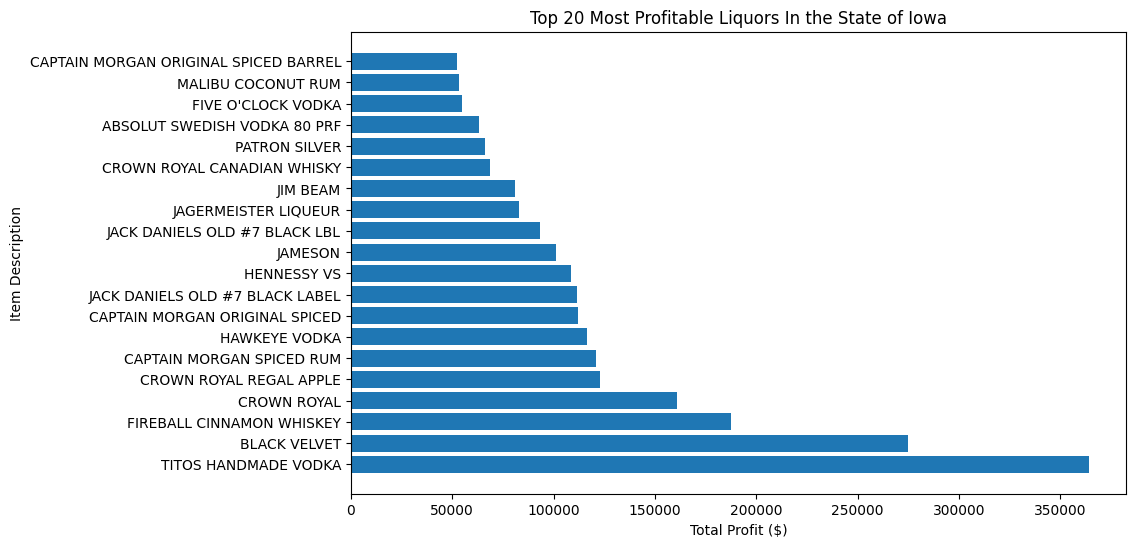

In [25]:
top_liquors = profit_sorted.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_liquors.index, top_liquors.values)
plt.xlabel('Total Profit ($)')
plt.ylabel('Item Description')
plt.title('Top 20 Most Profitable Liquors In the State of Iowa')
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [26]:
x = np.array([1,3,5])
y = np.array([2,5])

In [27]:
first_attempt_subtraction = x - y
first_attempt_subtraction

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [28]:
second_attempt_subtraction = x.reshape(-1,1) - y.reshape(1,-1)
second_attempt_subtraction

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

What happens when you try and subtract them using reshape is that you get a 3 by 2 array. This array happens because the reshape causes the y array to now be 1 by 2. Before the arrays could not be subtracted because x had 3 values and y had 2 values. Now the arrays can be subtracted because x is now 3 by 1 and y is 1 by 2, so the each value of the 3 by 1 array, x, subtracts each value in the 1 by 2, y, making the 3 by 2 array.

In [29]:
third_attempt_subtraction = x.reshape(1,-1) - y.reshape(-1,1)
third_attempt_subtraction

array([[-1,  1,  3],
       [-4, -2,  0]])

Now the x array is 1 by 3 and the y array is 2 by 1, so the 1 by 3 array subtracts the 2 by 1 array, making the 2 by 3 array. As you can see the numbers in the array are the same but the order is different because the x and y arrays were reshaped.

In [30]:
array_3x2 = []
for i in x:
    row = []
    for j in y:
        row.append(i-j)
    array_3x2.append(row)
print(np.array(array_3x2))

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


In [32]:
array_2x3 = []
for i in y:
    row = []
    for j in x:
        row.append(j-i)
    array_2x3.append(row)
print(np.array(array_2x3))

[[-1  1  3]
 [-4 -2  0]]


The difference in x.reshape(-1, 1) and x.reshape(1, -1) is that the x.reshape(-1, 1) is a 3 by 1 array and the x.reshape(1, -1) is a 1 by 3 array. The reshape method in this use case changes the shape of the array. It basically transposes the array.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

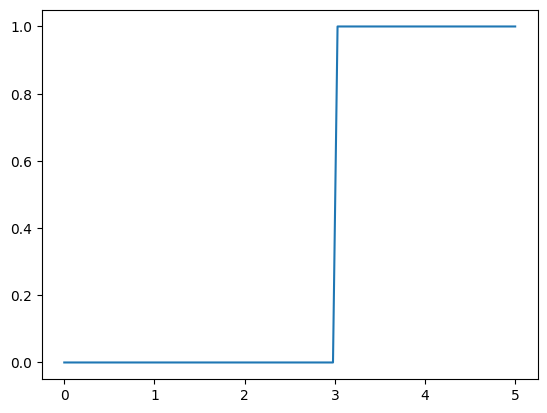

In [33]:
x = 3
z = np.linspace(0,5,100)
indicator = (x <= z)

plt.figure()
plt.plot(z, indicator)
plt.show()

When x > z, the indicator function is 0. When x <= z, the indicator function is 1. So when x <= 0 and the indicator is equal to 1 and if you subtract that by 1 then you get the indicator function for x > z, which is 0. So 1 - the indicator function for x <= z is equal tothe indicator function for x > z. Which is what makes the statement above true.

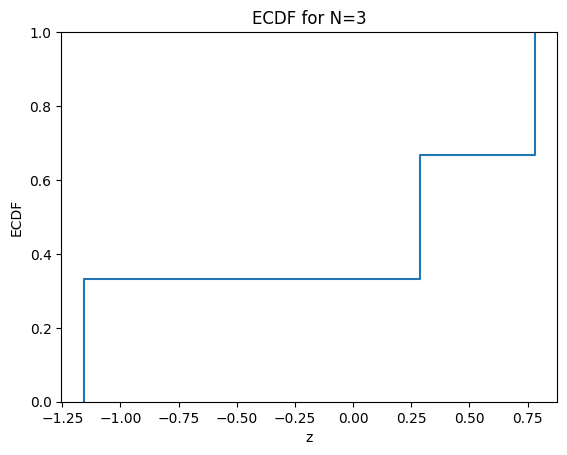

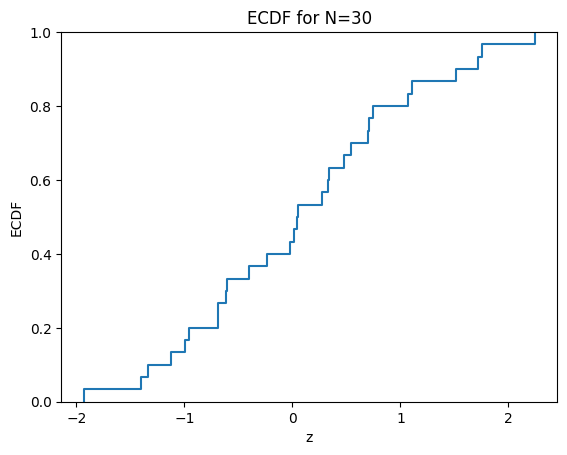

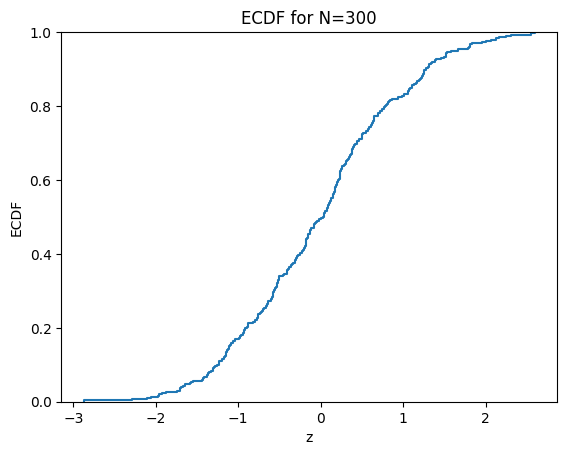

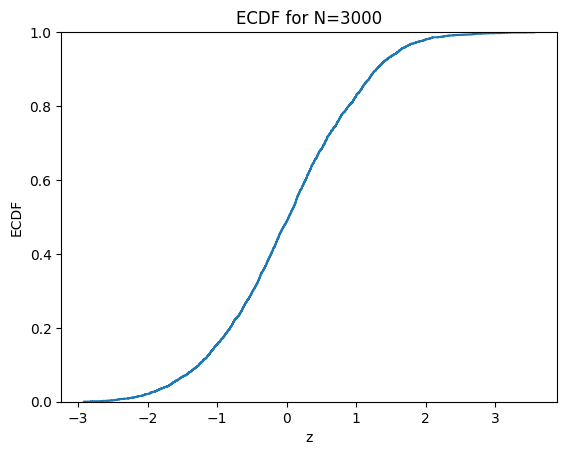

In [34]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    plt.figure()
    sns.ecdfplot(X)
    plt.xlabel('z')
    plt.ylabel('ECDF')
    plt.title(f'ECDF for N={N}')
    plt.show()





As you can see as N increases the ECDF curve flattens out. This is because as N increases the data becomes more and more normal. You can see this directly in the graphs.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [59]:
def find_quantile(x, q):
    if q < 0 or q > 1:
        raise ValueError("q must be between 0 and 1")
    
    sort_x = sorted(x)
    n = len(sort_x)
    i = q * (n-1)
    low = int(i)
    high = min(low + 1, n - 1)
    fration = i - low
    return sort_x[low] + (sort_x[high] - sort_x[low]) * fration

In [71]:
def find_iqr(x):
    x_sorted = sorted(x)
    q1 = find_quantile(x, 0.25)
    q3 = find_quantile(x, 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    low_whis = next(z for z in x_sorted if z > lower)
    high_whis = next(z for z in reversed(x_sorted) if z < upper)
    return {"Q1": q1, "Q3": q3, "IQR": iqr, "Lower Bound": lower, "Upper Bound": upper, "Whiskers": (low_whis, high_whis)}

In [72]:
def five_number_summary(x):
    sorted_x = sorted(x)
    q1 = find_quantile(x, 0.25)
    median = find_quantile(x, 0.5)
    q3 = find_quantile(x, 0.75)
    
    iqr = find_iqr(x)
    lower = iqr["Whiskers"][0]
    upper = iqr["Whiskers"][1]

    return {"min": sorted_x[0], "Q1": q1, "Median": median, "Q3": q3, "max": sorted_x[-1], "Whiskers": (lower, upper)}

In [80]:
def find_outlier(x):
    iqr = find_iqr(x)
    sorted_x = sorted(x)
    lower = iqr["Whiskers"][0]
    upper = iqr["Whiskers"][1]
    return [(z < lower) or (z > upper) for z in sorted_x]


In [81]:
#1st Function
find_quantile(df['Bottles Sold'], 0.5)


6.0

In [82]:
#2nd Function
find_iqr(df['Bottles Sold'])

{'Q1': 3.0,
 'Q3': 12.0,
 'IQR': 9.0,
 'Lower Bound': -10.5,
 'Upper Bound': 25.5,
 'Whiskers': (-6, 25)}

In [83]:
#3rd Function
five_number_summary(df['Bottles Sold'])

{'min': -60,
 'Q1': 3.0,
 'Median': 6.0,
 'Q3': 12.0,
 'max': 2400,
 'Whiskers': (-6, 25)}

In [84]:
#4th Function
find_outlier(df['Bottles Sold'])

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

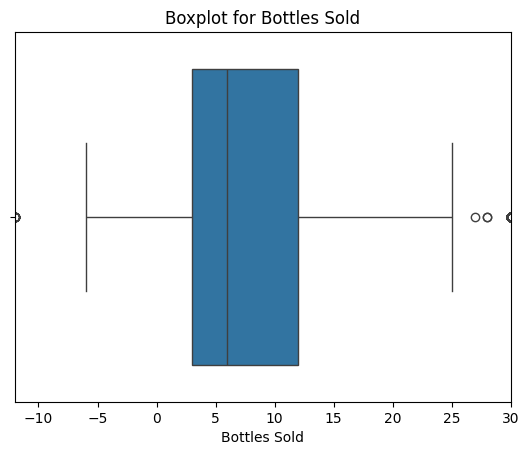

In [88]:
boxplot = sns.boxplot(df['Bottles Sold'],orient='h')
boxplot.set_xlim(-12, 30)
plt.title('Boxplot for Bottles Sold')
plt.show()

In [89]:
df['Bottles Sold'].describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

After looking at the results from the boxplot and comparing them to my results from the functions, I can see that the boxplot and the functions give the same results.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [114]:
def compute_bandwidth(x):
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    h_s = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    return h_s

(array([4.53359148e-06, 4.53359148e-06, 4.53359148e-06, 1.36007744e-05,
       5.89366892e-05, 4.08084670e-05, 5.48937620e-06, 9.78916914e-06,
       2.87922595e-05, 1.45715674e-04, 1.01617834e-01, 1.19009819e-01,
       9.06894685e-02, 5.22355827e-02, 4.52060501e-02, 1.51603890e-01,
       3.07064828e-02, 5.63343157e-03, 2.53779311e-03, 5.83166550e-03,
       3.77693946e-02, 1.90681737e-01, 3.66123828e-02, 4.21070618e-04,
       4.35432063e-04, 5.20711391e-04, 1.01934232e-03, 4.81856733e-03,
       1.02394636e-03, 5.07833528e-04, 1.05636762e-04, 6.69821939e-05,
       4.43130688e-02, 8.51035209e-03, 6.30180033e-06, 1.28237874e-05,
       2.13347720e-03, 4.31967372e-04, 5.53718164e-05, 1.39655424e-05,
       1.20832221e-03, 6.27170272e-03, 1.20745244e-03, 8.19854616e-05,
       2.81494197e-04, 2.23396581e-04, 4.71575068e-05, 1.23540429e-02,
       2.12709549e-05, 7.70710551e-05, 7.29064511e-04, 3.77735148e-03,
       4.98695062e-05, 6.17354599e-06, 1.21047507e-03, 7.25436058e-05,
     

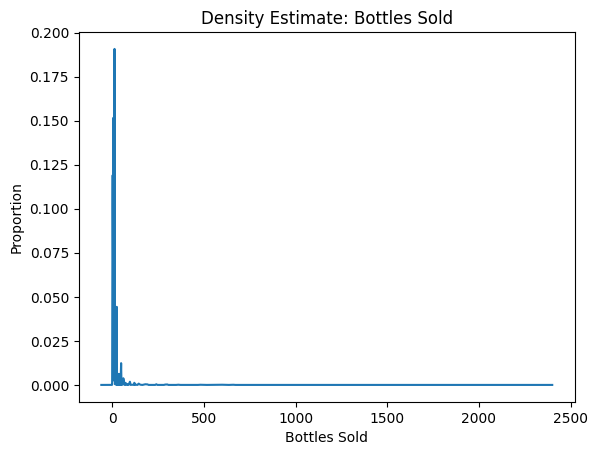

In [ ]:
def k_gaussian(x, h_s, plot = True):
        Z = np.sort(x.unique()).reshape(1,-1)
        data = x.to_numpy().reshape(-1,1)

        I = np.exp( -(data-Z)**2/(2*h_s**2) )/( np.sqrt(2*np.pi) * h_s)
        kde = np.mean(I,axis=0)
        grid = Z.reshape(-1,1)

        if plot:
            title_str = x.name
            plt.plot(grid,kde)
            plt.title(f'Density Estimate: {title_str}')
            plt.ylabel('Proportion')
            plt.xlabel(title_str)
        return kde, grid

run = k_gaussian(df['Bottles Sold'], compute_bandwidth(df['Bottles Sold']))
print(run)

(array([-1.43899812e+04, -1.05335200e+04, -6.08615732e+03, -4.96032420e+03,
       -3.24358964e+03, -2.65268819e+03, -2.49534560e+03, -2.42410392e+03,
       -2.35781531e+03, -2.29647976e+03, -2.18866789e+03, -2.14219156e+03,
       -2.10066830e+03, -2.06409811e+03, -2.03248099e+03, -2.00581695e+03,
       -1.98410597e+03, -1.96734807e+03, -1.95554323e+03, -1.94869147e+03,
       -1.94679278e+03, -1.94984716e+03, -1.95785461e+03, -1.97081513e+03,
       -1.98872872e+03, -2.01159539e+03, -2.03941512e+03, -2.07218793e+03,
       -2.10991380e+03, -2.15259275e+03, -2.20022477e+03, -2.25280985e+03,
       -2.37283925e+03, -2.44028355e+03, -2.59003136e+03, -2.67233488e+03,
       -2.85180112e+03, -2.94896385e+03, -3.05107965e+03, -3.27017045e+03,
       -3.38714547e+03, -3.50907355e+03, -3.63595470e+03, -4.04631659e+03,
       -4.34465653e+03, -4.66280876e+03, -4.82931448e+03, -5.35855007e+03,
       -5.73613915e+03, -6.55075416e+03, -7.68046702e+03, -7.92126880e+03,
       -9.47009400e+03, 

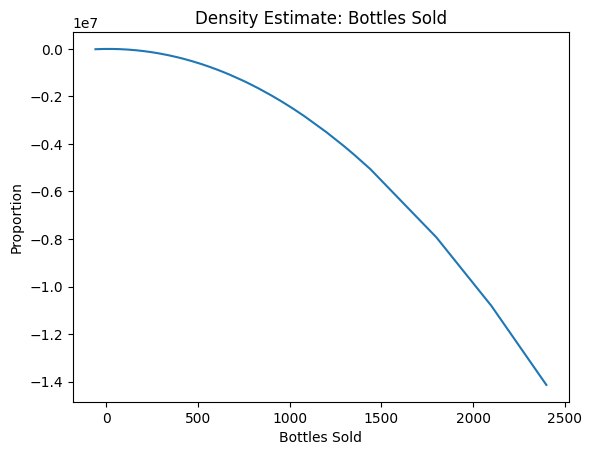

In [132]:

def k_epanechnikov(x, h_s, plot = True):
        Z = np.sort(x.unique()).reshape(1,-1)
        data = x.to_numpy().reshape(-1,1)

        I = 0.75 * (1 - (data-Z)**2/h_s**2)
        kde = np.mean(I,axis=0)
        grid = Z.reshape(-1,1)

        if plot:
            title_str = x.name
            plt.plot(grid,kde)
            plt.title(f'Density Estimate: {title_str}')
            plt.ylabel('Proportion')
            plt.xlabel(title_str)
        return kde, grid

run = k_epanechnikov(df['Bottles Sold'], compute_bandwidth(df['Bottles Sold']))
print(run)

(array([  64.40295575,   53.50017036,   37.14619683,   31.6949405 ,
         20.79283696,   15.34267158,   13.52615434,   12.61790708,
         11.70967119,   10.80149212,    8.98527034,    8.28831447,
          7.81725276,    7.51184449,    7.30033719,    7.11196705,
          7.29854167,    7.48765047,    7.68962335,    7.892869  ,
          8.10975149,    8.32700899,    9.02213525,    9.71730697,
         10.41271734,   11.10895728,   11.80632225,   12.50370996,
         13.21316626,   13.92263393,   14.63335164,   15.34409208,
         16.76559569,   17.58741951,   19.2311126 ,   20.05297051,
         21.69673179,   22.52395352,   23.35120935,   25.00597101,
         25.8333632 ,   26.66076676,   27.50388676,   30.03328088,
         31.71995273,   33.40803372,   34.25263105,   36.78645714,
         38.53760849,   42.03995664,   46.41885777,   47.29464937,
         52.60619632,   56.14772765,   57.91851604,   63.24908638,
         65.02630681,   68.58079312,   72.13991596,   73.9195

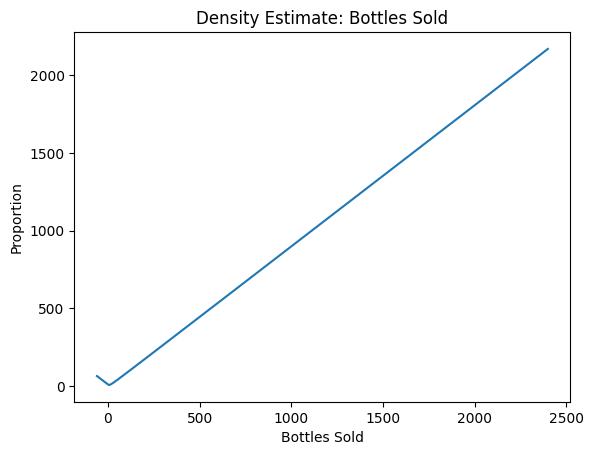

In [134]:
def k_uniform(x, h_s, plot = True):
        Z = np.sort(x.unique()).reshape(1,-1)
        data = x.to_numpy().reshape(-1,1)

        I = 0.5 * (np.abs(data-Z)/h_s)
        kde = np.mean(I,axis=0)
        grid = Z.reshape(-1,1)

        if plot:
            title_str = x.name
            plt.plot(grid,kde)
            plt.title(f'Density Estimate: {title_str}')
            plt.ylabel('Proportion')
            plt.xlabel(title_str)
        return kde, grid

run = k_uniform(df['Bottles Sold'], compute_bandwidth(df['Bottles Sold']))
print(run)

(array([ -127.80591149,  -106.00034072,   -73.29239366,   -62.38988101,
         -40.58567392,   -29.68534316,   -26.05230868,   -24.23581417,
         -22.41934238,   -20.60298424,   -16.97054069,   -15.57662894,
         -14.63450552,   -14.02368898,   -13.60067438,   -13.2239341 ,
         -13.59708335,   -13.97530095,   -14.37924671,   -14.78573801,
         -15.21950298,   -15.65401798,   -17.0442705 ,   -18.43461394,
         -19.82543467,   -21.21791455,   -22.61264451,   -24.00741992,
         -25.42633253,   -26.84526787,   -28.26670329,   -29.68818417,
         -32.53119138,   -34.17483902,   -37.46222521,   -39.10594103,
         -42.39346358,   -44.04790705,   -45.7024187 ,   -49.01194201,
         -50.6667264 ,   -52.32153351,   -54.00777353,   -59.06656176,
         -62.43990546,   -65.81606744,   -67.50526211,   -72.57291428,
         -76.07521698,   -83.07991328,   -91.83771555,   -93.58929873,
        -104.21239265,  -111.29545529,  -114.83703207,  -125.49817276,
     

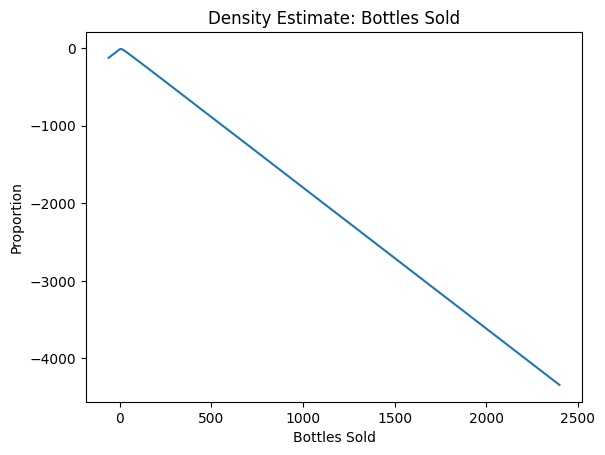

In [123]:
def k_triangular(x, h_s, plot = True):
        Z = np.sort(x.unique()).reshape(1,-1)
        data = x.to_numpy().reshape(-1,1)

        I = 1 - np.abs(data-Z)/h_s
        kde = np.mean(I,axis=0)
        grid = Z.reshape(-1,1)

        if plot:
            title_str = x.name
            plt.plot(grid,kde)
            plt.title(f'Density Estimate: {title_str}')
            plt.ylabel('Proportion')
            plt.xlabel(title_str)
        return kde, grid

run = k_triangular(df['Bottles Sold'], compute_bandwidth(df['Bottles Sold']))
print(run)